# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A13526259, emz002@ucsd.edu, Emily Zhao
- A13555197, rwegznek@ucsd.edu, Rebecca Wegznek
- 
- 



### Introduction and Background:
What is the relationship between gender and the lifestyle of Stack Overflow users, and what does this tell us about gender differences in computer science? E.g. job satisfaction, salary/experience, contribution to Stack Overflow, wake time, ethics, frequency of skipping meals, etc.

We expect that there will be significant differences between male and female respondents in job satisfaction, formal education, years coding, years coding professionally, salary/experience, contribution to Stack Overflow, ethics, age, country of residence, and hope in 5 years.
We believe that females will express higher job satisfaction, have lower salary and experience, contribute less to Stack Overflow, have higher concern for ethics, be of lower average age, be predominantly from Western countries, and have less ambitious hopes for the next 5 years.

There is a significant gender disparity in terms of representation and level of achievement in the tech and computer science fields, and we were interested in seeing if and how these disparities manifest themselves in the everyday lives of developers. Historically, tech has been a male dominated field because of various structural and social limitations placed on the female gender. According to Entelo’s Women in Tech report, across the US, only 18% of tech roles are held by women, and 82% held by men. This disparity widens as we move up to senior levels as only 16% of senior level jobs in tech are held by women.

These differences in representation reflect social attitudes against women participating in tech. There is often a lack of consideration for the challenges that women face in the workplace, such as a lack of HR policies and benefits packages (Information Age).

We believe that these limitations and social attitudes are reflected in the other aspects of daily life, including job satisfaction, salary, wake time, and more. We hypothesized that because of these historical differences, females would hold job satisfaction at a lower standard than males, make less money, be more concerned with ethics, and remember their meals. It is important to recognize these differences between genders and correlations among different aspects of daily life to show that there is an unfair disparity between genders.

References:
1) Entelo: Women in Tech Report. https://blog.entelo.com/entelo-women-in-tech-report 
2) Information Age, https://www.information-age.com/tech-gender-gap-2018-123471061/ 

### Data Description
Dataset Name: Stack Overflow 2018 Developer Survey
Link to the dataset: https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey
Number of observations: 98,855 

This data is retrieved from Stack Overflow’s 2018 Developer Survey, in which they ask the developer community a range of questions (129 total). The developers were asked questions about their personal attributes as well as interests.

### Data Cleaning/Pre-processing

In [1]:
# Imports -  These are all you need for the assignment: do not import additional packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df = pd.read_csv('survey_results_public.csv', low_memory=False)
df = df[['Gender', 'Age', 'Country', 'Hobby', 'Student', 'FormalEducation', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'AIFuture',
'StackOverflowParticipate', 'StackOverflowConsiderMember', 'EthicsChoice']]
df.dropna(inplace=True)

In [3]:
df.head(5)

,Gender,Age,Country,Hobby,Student,FormalEducation,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,AIFuture,StackOverflowParticipate,StackOverflowConsiderMember,EthicsChoice
0,Male,25 - 34 years old,Kenya,Yes,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,I'm excited about the possibilities more than ...,I have never participated in Q&A on Stack Over...,Yes,No
1,Male,35 - 44 years old,United Kingdom,Yes,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I'm excited about the possibilities more than ...,A few times per month or weekly,Yes,Depends on what it is
3,Male,35 - 44 years old,United States,No,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,Working as a founder or co-founder of my own c...,"I don't care about it, or I haven't thought ab...",A few times per month or weekly,Yes,No
4,Male,18 - 24 years old,South Africa,Yes,"Yes, part-time",Some college/university study without earning ...,6-8 years,0-2 years,Slightly satisfied,Moderately satisfied,Working in a different or more specialized tec...,I'm excited about the possibilities more than ...,Less than once per month or monthly,Yes,No
5,Male,18 - 24 years old,United Kingdom,Yes,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",6-8 years,3-5 years,Moderately satisfied,Slightly satisfied,Working in a different or more specialized tec...,I'm excited about the possibilities more than ...,Less than once per month or monthly,No,Depends on what it is


In [4]:
len(df)

46473

In [5]:
df["Age"].unique()

array(['25 - 34 years old', '35 - 44 years old', '18 - 24 years old',
       '45 - 54 years old', '55 - 64 years old', 'Under 18 years old',
       '65 years or older'], dtype=object)

In [6]:
def shorten_age(string):
    string = string.lower()
    string = string.strip()
    
    if "25 - 34" in string:
        output = "25 - 34"
    elif "35 - 44" in string:
        output = "35 - 44"
    elif "18 - 24" in string:
        output = "18 - 24"
    elif "45 - 54" in string:
        output = "45 - 54"
    elif "55 - 64" in string:
        output = "55 - 64"
    elif "Under 18 years old" in string:
        output = "Under 18"
    elif "65 years or older" in string:
        output = "65 or older"
    # Otherwise, if uncaught - keep as is
    else:
        output = string
    
    return output

In [7]:
df["Age"] = df["Age"].apply(shorten_age)

In [8]:
df["Age"].value_counts()

25 - 34               25157
35 - 44                9113
18 - 24                8897
45 - 54                2408
55 - 64                 608
under 18 years old      230
65 or older              60
Name: Age, dtype: int64

### Data Visualization

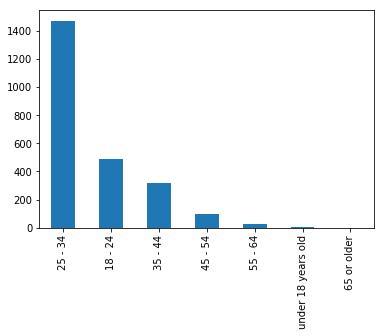

In [9]:
female = df[(df['Gender']=='Female')]
pd.value_counts(female['Age']).plot(kind="bar")
f2 = plt.gcf()

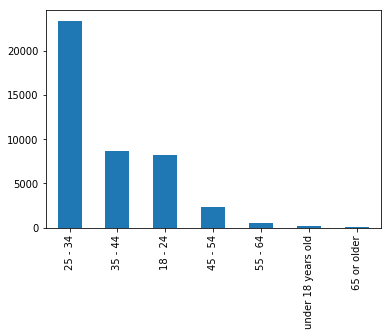

In [10]:
male = df[(df['Gender']=='Male')]
pd.value_counts(male['Age']).plot(kind="bar")
f1 = plt.gcf()

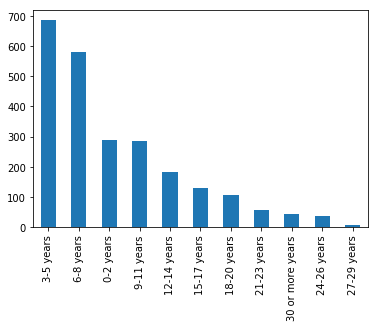

In [11]:
female["YearsCoding"].value_counts().plot(kind="bar")

f3 = plt.gcf()

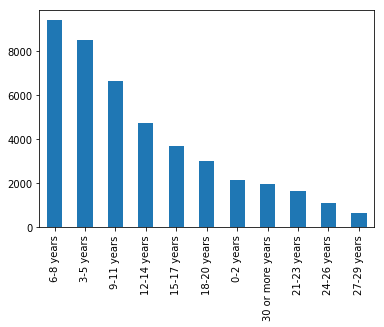

In [12]:
male["YearsCoding"].value_counts().plot(kind="bar")

f4 = plt.gcf()

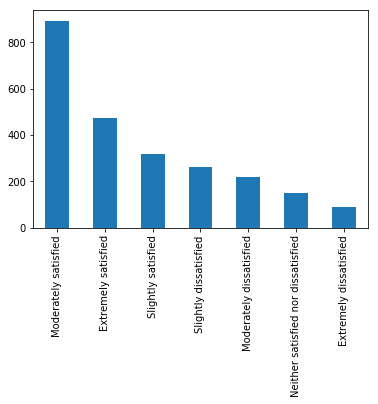

In [13]:
female["JobSatisfaction"].value_counts().plot(kind="bar")

f5 = plt.gcf()

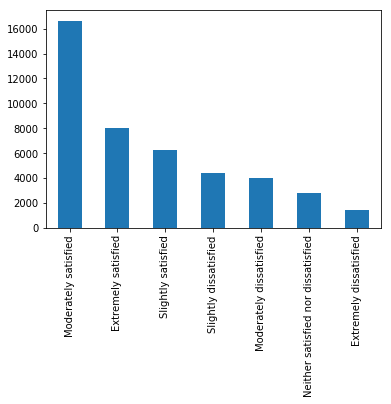

In [14]:
male["JobSatisfaction"].value_counts().plot(kind="bar")

f6 = plt.gcf()

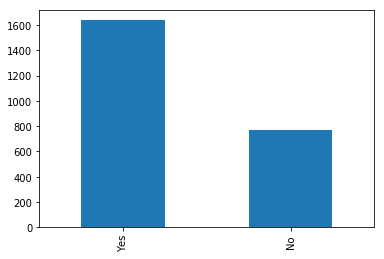

In [15]:
female["Hobby"].value_counts().plot(kind="bar")
f5 = plt.gcf()

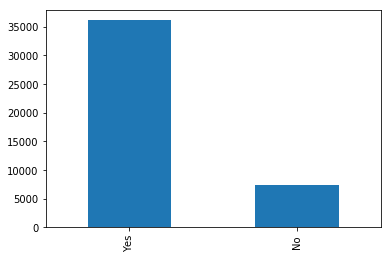

In [16]:
male["Hobby"].value_counts().plot(kind="bar")
f5 = plt.gcf()

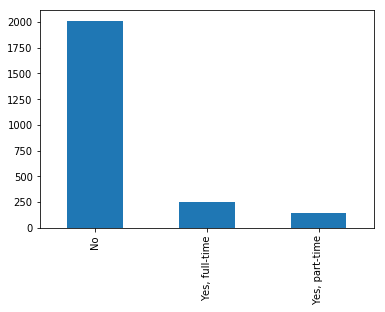

In [17]:
female["Student"].value_counts().plot(kind="bar")
f5 = plt.gcf()

### Data Analysis and Results

## chi squared tests

In [18]:
f = df[df['Gender'] == 'Female']['Country'].value_counts()
m = df[df['Gender'] == 'Male']['Country'].value_counts()

In [19]:
f_ratio = f['United States']/sum(f)
m_ratio = m['United States']/sum(m)

In [20]:
chisq, p_val_chi = stats.chisquare(np.array([f_ratio, m_ratio]), axis=None)

In [21]:
if p_val_chi < 0.01:
    print('There is a significant difference for country')
else:
    print('There is NOT a significant difference for country')

There is NOT a significant difference for country


In [22]:
#get value counts for job satisfaction per gender
f = df[df['Gender'] == 'Female']['JobSatisfaction'].value_counts()
m = df[df['Gender'] == 'Male']['JobSatisfaction'].value_counts()

In [23]:
f_ratio = f['Extremely satisfied']/sum(f)
m_ratio = m['Extremely satisfied']/sum(m)

In [24]:
#perform chi-squared test to see if the difference in satisfaction is significant
chisq, p_val_chi = stats.chisquare(np.array([f_ratio, m_ratio]), axis=None)

In [25]:
if p_val_chi < 0.01:
    print('There is a significant difference for job satisfaction')
else:
    print('There is NOT a significant difference for job satisfaction')

There is NOT a significant difference for job satisfaction


In [26]:
f = df[df['Gender'] == 'Female']['YearsCoding'].value_counts()
m = df[df['Gender'] == 'Male']['YearsCoding'].value_counts()

In [27]:
f_ratio = f['30 or more years']/sum(f)
m_ratio = m['30 or more years']/sum(m)

In [28]:
#perform chi-squared test to see if the difference in years coding is significant
chisq, p_val_chi = stats.chisquare(np.array([f_ratio, m_ratio]), axis=None)

In [29]:
if p_val_chi < 0.01:
    print('There is a significant difference for years coding')
else:
    print('There is NOT a significant difference for years coding')

There is NOT a significant difference for years coding


In [30]:
f = df[df['Gender'] == 'Female']['FormalEducation'].value_counts()
m = df[df['Gender'] == 'Male']['FormalEducation'].value_counts()

In [31]:
f_ratio = f['Bachelor’s degree (BA, BS, B.Eng., etc.)']/sum(f)
m_ratio = m['Bachelor’s degree (BA, BS, B.Eng., etc.)']/sum(m)

In [32]:
#perform chi-squared test to see if the difference in formal education is significant
chisq, p_val_chi = stats.chisquare(np.array([f_ratio, m_ratio]), axis=None)

In [33]:
if p_val_chi < 0.05:
    print('There is a significant difference for formal education')
else:
    print('There is NOT a significant difference for formal education')

There is NOT a significant difference for formal education


## Regression

In [34]:
df2 = pd.concat([female, male])

In [35]:
# predict country -- only United States and India -- from gender
# to simplify regression for predicting country, just used India and United States
india = df2[df2['Country'] == 'India']
us = df2[df2['Country'] == 'United States']
df3 = pd.concat([india, us])

In [36]:
def convert_country(label):
    if(label == 'United States'):
        return 1.0
    else: # label == 'India'
        return 0.0

In [37]:
df3['Country2'] = df3['Country'].apply(convert_country)

In [38]:
outcome_1, predictors_1 = patsy.dmatrices('Country2 ~ Gender', df3)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [39]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Country2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.836
Date:                Tue, 19 Mar 2019   Prob (F-statistic):            0.00296
Time:                        17:38:14   Log-Likelihood:                -9991.0
No. Observations:               15805   AIC:                         1.999e+04
Df Residuals:                   15803   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7471      0.014     52.

In [40]:
# predict job satisfaction from gender
def convert_jobsat(label):
    if(label == 'Extremely satisfied'):
        return 6.0
    elif(label == 'Moderately satisfied'):
        return 5.0
    elif(label == 'Slightly satisfied'):
        return 4.0
    elif(label == 'Neither satisfied nor dissatisfied'):
        return 3.0
    elif(label == 'Slightly dissatisfied'): 
        return 2.0
    elif(label == 'Moderately dissatisfied'):
        return 1.0
    else: # label == 'Extremely dissatisfied'
        return 0.0

In [41]:
df2['JobSatisfaction2'] = df2['JobSatisfaction'].apply(convert_jobsat)

In [42]:
outcome_1, predictors_1 = patsy.dmatrices('JobSatisfaction2 ~ Gender', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [43]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       JobSatisfaction2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1373
Date:                Tue, 19 Mar 2019   Prob (F-statistic):              0.711
Time:                        17:38:16   Log-Likelihood:                -89915.
No. Observations:               45920   AIC:                         1.798e+05
Df Residuals:                   45918   BIC:                         1.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0636      0.035    116.

In [44]:
# predict years coding from gender
# to easily convert this just used average year for each
def convert_years(label):
    if(label == '6-8 years'):
        return 7.0
    elif(label == '3-5 years'):
        return 6.0
    elif(label == '9-11 years'):
        return 10.0
    elif(label == '12-14 years'):
        return 13.0
    elif(label == '15-17 years'):
        return 16.0
    elif(label == '18-20 years'):
        return 19.0
    elif(label == '0-2 years'):
        return 1.0
    elif(label == '30 or more years'):
        return 30.0
    elif(label == '21-23 years'):
        return 22.0
    elif(label == '24-26 years'):
        return 25.0
    elif(label == '27-29 years'):
        return 28.0
    else:
        return 0.0

In [45]:
df2['YearsCoding2'] = df2['YearsCoding'].apply(convert_years)

In [46]:
outcome_1, predictors_1 = patsy.dmatrices('YearsCoding2 ~ Gender', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [47]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           YearsCoding2   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     327.2
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           6.86e-73
Time:                        17:38:16   Log-Likelihood:            -1.5483e+05
No. Observations:               45920   AIC:                         3.097e+05
Df Residuals:                   45918   BIC:                         3.097e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.9406      0.144     62.

In [48]:
# formal education from gender
# convert formal education by giving average number of years to get that degree
def convert_ed(label):
    if(label == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'):
        return 16.0
    elif(label == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'):
        return 18.0
    elif(label == 'Some college/university study without earning a degree'):
        return 14.0
    elif(label == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'):
        return 12.0
    elif(label == 'Associate degree'):
        return 14.0
    elif(label == 'Other doctoral degree (Ph.D, Ed.D., etc.)'):
        return 24.0
    elif(label == 'Professional degree (JD, MD, etc.)'):
        return 21.0
    elif(label == 'Primary/elementary school'):
        return 8.0
    elif(label == 'I never completed any formal education'):
        return 5.0
    else:
        return 0.0

In [49]:
df2['FormalEducation2'] = df2['FormalEducation'].apply(convert_ed)

In [50]:
outcome_1, predictors_1 = patsy.dmatrices('FormalEducation2 ~ Gender', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [51]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       FormalEducation2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.08
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           2.46e-10
Time:                        17:38:19   Log-Likelihood:            -1.0369e+05
No. Observations:               45920   AIC:                         2.074e+05
Df Residuals:                   45918   BIC:                         2.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.4426      0.047    348.

### Privacy/Ethics Considerations 
We have permission to use this dataset for the purpose of exploring our hypothesis. The only potential privacy concern is that the respondents ages are included, so we’ll have to edit that to make sure it only includes respondents between the ages of 18 to 90. There are some biases in the dataset because the majority of responders (over 90%) to the survey are male. It also looks primarily at the lifestyle of people working in computing, so our results may only be generalizable to those who work in computing. There are no potential problems when it comes to data privacy and equitable impact. In order to deal with the gender bias we plan to use t-tests, chi-squared tests and regression so it won’t hugely affect our results.

### Conclusions and Discussion

As shown from the data analysis and visualization sections, we can see that there is not a signifcant difference for job satisfaction between female and males. 